<a href="https://colab.research.google.com/github/johsheldon/IMSE-541-Public/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/TrentDodge/SQC/main/Lab5screen%20(1).csv', sep=',', na_values=".")
data

,Trial,A,B,C,D,E,Distance
0,1,-1,-1,-1,-1,-1,0
1,2,1,-1,-1,-1,-1,-12
2,6,-1,1,-1,-1,-1,-54
3,3,-1,-1,1,-1,-1,3
4,4,-1,-1,-1,1,-1,77
5,5,-1,-1,-1,-1,1,-107
6,7,-1,-1,-1,-1,-1,-20
7,8,1,-1,-1,-1,-1,-24
8,12,-1,1,-1,-1,-1,-45
9,9,-1,-1,1,-1,-1,12


In [ ]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Trial     12 non-null     int64
 1   A         12 non-null     int64
 2   B         12 non-null     int64
 3   C         12 non-null     int64
 4   D         12 non-null     int64
 5   E         12 non-null     int64
 6   Distance  12 non-null     int64
dtypes: int64(7)
memory usage: 800.0 bytes


In [ ]:
X=df[['A', 'B', 'C', 'D', 'E']]
X = sm.add_constant(X) # adding a constant
X
Y=df[['Distance']]
Y

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Distance
0,0
1,-12
2,-54
3,3
4,77
5,-107
6,-20
7,-24
8,-45
9,12


In [ ]:
model = sm.OLS(Y, X)
res1=model.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     16.62
Date:                Tue, 25 Oct 2022   Prob (F-statistic):            0.00185
Time:                        20:47:51   Log-Likelihood:                -47.669
No. Observations:                  12   AIC:                             107.3
Df Residuals:                       6   BIC:                             110.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.5000     24.043     -1.809      0.1

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


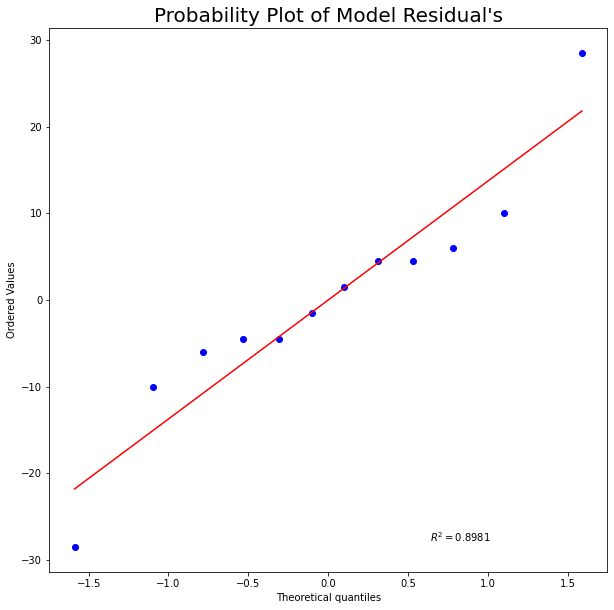

In [ ]:
res1.resid
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res1.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
eij=res1.resid
eij

0     10.0
1      6.0
2     -4.5
3     -4.5
4     28.5
5     -1.5
6    -10.0
7     -6.0
8      4.5
9      4.5
10   -28.5
11     1.5
dtype: float64

In [ ]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[8, 9, 10, 2, 1, 7, 0, 5, 4, 3, 11, 6]


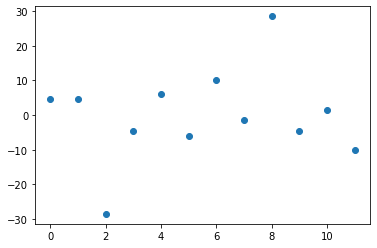

In [ ]:
eij=res1.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/TrentDodge/SQC/main/sqc3.csv', sep=',', na_values=".")
data1

,Trial,B,D,E,BD,BE,Distance
0,17,-1,-1,-1,1,1,-4
1,38,-1,-1,-1,1,1,-2
2,33,-1,-1,-1,1,1,9
3,68,-1,-1,-1,1,1,10
4,55,-1,-1,-1,1,1,17
...,...,...,...,...,...,...,...
75,7,1,1,1,1,1,-132
76,48,1,1,1,1,1,-126
77,30,1,1,1,1,1,-133
78,40,1,1,1,1,1,-125


In [ ]:
del data1['BD']
del data1['BE']

In [ ]:
df1=data1 #df means data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Trial     80 non-null     int64
 1   B         80 non-null     int64
 2   D         80 non-null     int64
 3   E         80 non-null     int64
 4   Distance  80 non-null     int64
dtypes: int64(5)
memory usage: 3.2 KB


In [ ]:
bb=df1[['B']].to_numpy()
ee=df1[['E']].to_numpy()
dd=df1[['D']].to_numpy()
BD=bb*dd
BE=bb*ee
DE=dd*ee
BDE=bb*dd*ee

In [ ]:
df1['BD']=BD
df1['BE']=BE
df1['DE']=DE
df1['BDE']=BDE

In [ ]:
X1=df1[['B', 'D', 'E', 'BD', 'BE', 'DE', 'BDE']]
X1 = sm.add_constant(X1) # adding a constant
X1
Y1=df1[['Distance']]
Y1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Distance
0,-4
1,-2
2,9
3,10
4,17
...,...
75,-132
76,-126
77,-133
78,-125


In [ ]:
model1 = sm.OLS(Y1, X1)
res1=model1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1139.
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           4.68e-71
Time:                        20:47:53   Log-Likelihood:                -269.86
No. Observations:                  80   AIC:                             555.7
Df Residuals:                      72   BIC:                             574.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.7625      0.832    -73.038      0.0

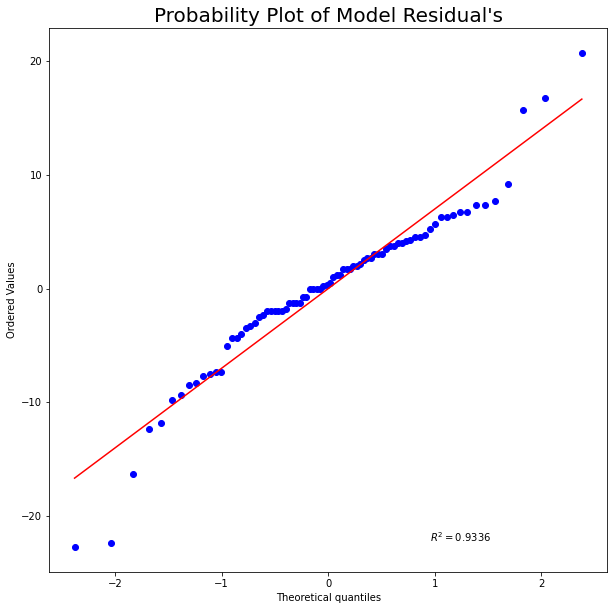

In [ ]:
res1.resid
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res1.resid, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
eij=res1.resid
eij

0    -11.8
1     -9.8
2      1.2
3      2.2
4      9.2
      ... 
75     0.3
76     6.3
77    -0.7
78     7.3
79     6.3
Length: 80, dtype: float64

In [ ]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[61, 76, 49, 67, 41, 66, 79, 4, 69, 17, 22, 28, 72, 42, 21, 11, 71, 78, 39, 60, 50, 27, 29, 52, 68, 31, 7, 44, 40, 73, 53, 10, 19, 64, 12, 58, 62, 3, 36, 23, 14, 0, 51, 16, 35, 70, 54, 77, 46, 43, 26, 45, 9, 65, 47, 6, 48, 18, 34, 24, 5, 37, 59, 25, 63, 55, 8, 56, 75, 57, 74, 20, 38, 15, 30, 1, 33, 32, 13, 2]


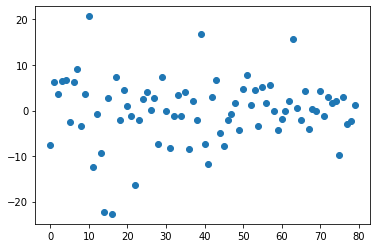

In [ ]:
eij=res1.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

In [ ]:
stats.levene(df1['Distance'][df1['B'] == -1],
             df1['Distance'][df1['B'] == 1])

LeveneResult(statistic=26.95026353534054, pvalue=1.6162946172541994e-06)

In [ ]:
stats.levene(df1['Distance'][df1['D'] == -1],
             df1['Distance'][df1['D'] == 1])

LeveneResult(statistic=0.3532339383820626, pvalue=0.5540081760043778)

In [ ]:
stats.levene(df1['Distance'][df1['E'] == -1],
             df1['Distance'][df1['E'] == 1])

LeveneResult(statistic=39.9350025905914, pvalue=1.5039444347003173e-08)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


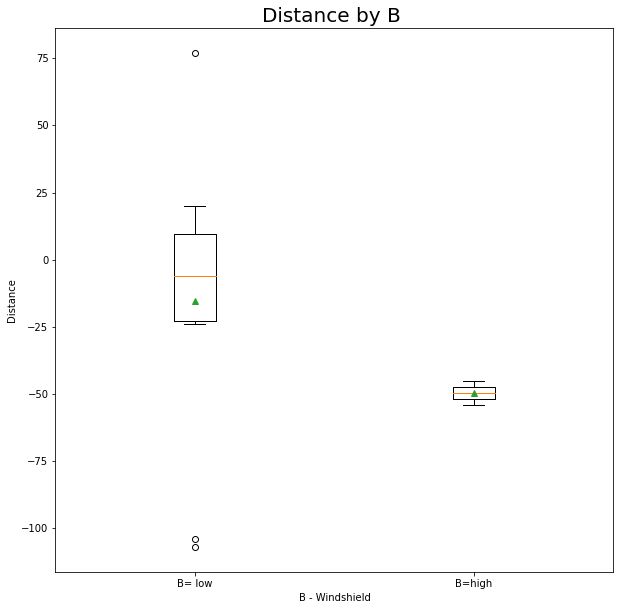

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance by B ", fontsize= 20)
ax.set

data1 = [df['Distance'][df['B'] == -1],
             df['Distance'][df['B'] == 1]]


ax.boxplot(data1,
           labels= ['B= low', 'B=high'],
           showmeans= True)

plt.xlabel("B - Windshield")
plt.ylabel("Distance")

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


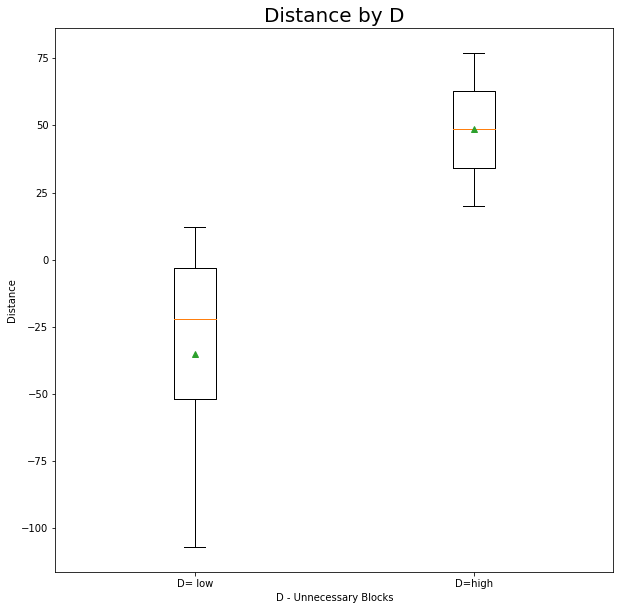

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance by D", fontsize= 20)
ax.set

data1 = [df['Distance'][df['D'] == -1],
             df['Distance'][df['D'] == 1]]


ax.boxplot(data1,
           labels= ['D= low', 'D=high'],
           showmeans= True)

plt.xlabel("D - Unnecessary Blocks")
plt.ylabel("Distance")

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


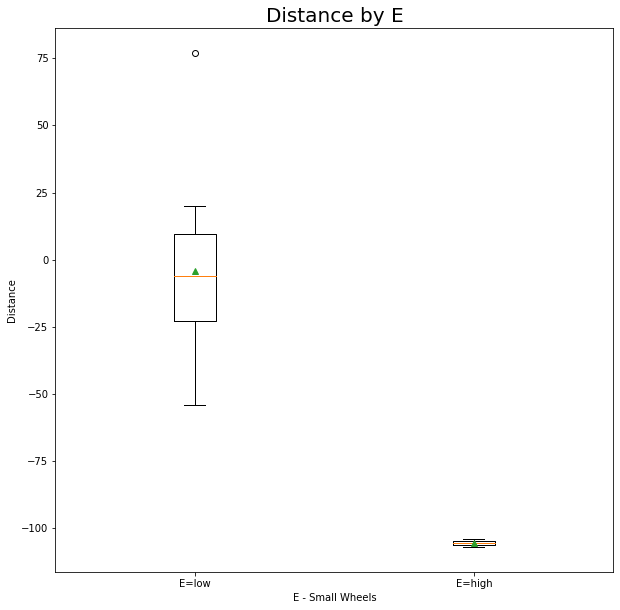

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Distance by E", fontsize= 20)
ax.set

data1 = [df['Distance'][df['E'] == -1],
             df['Distance'][df['E'] == 1]]


ax.boxplot(data1,
           labels= ['E=low', 'E=high'],
           showmeans= True)

plt.xlabel("E - Small Wheels")
plt.ylabel("Distance")

plt.show()